In [3]:
import numpy as np
import scipy.sparse as sc
import networkx as nx
from numpy.random import normal, choice
import pandas as pd
import scipy.sparse.linalg as spla
import concurrent.futures
import matplotlib.pyplot as plt

In [5]:
imp = pd.read_csv(f'/home/shardul/impedance_exp/nyquist/Impedance NbMoSe2.csv',delimiter=',')

In [7]:
imp.head()

,ang freq,ReZ,ReZ.1,ReZ.2,ReZ.3,ReZ.4,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,rad/s,NaN,NaN,NaN,NaN,NaN,NaN,Nb:MoSe2,NSJ
1,NaN,50um,80um,100um,150um,200um,NaN,NaN,NaN
2,125.66371,8.15E+07,1604003.03103,1442835.98628,1186440.61149,1917008.34594,NaN,NaN,NaN
3,134.92512,8.14E+07,1604286.78863,1441230.51229,1184688.58503,1913547.11387,NaN,NaN,NaN
4,144.86512,8.14E+07,1601221.49993,1440484.95364,1185075.77042,1910412.29689,NaN,NaN,NaN


In [9]:
new_imp = pd.DataFrame()

In [11]:
new_imp["freq"] = pd.to_numeric(imp.dropna(subset = 'ang freq',inplace = False)['ang freq'],errors='coerce').dropna()

In [13]:
new_imp["imp1"] = pd.to_numeric(imp.dropna(subset = 'ReZ',inplace = False)['ReZ'],errors='coerce').dropna()

In [15]:
new_imp["imp2"] = pd.to_numeric(imp.dropna(subset = 'ReZ.1',inplace = False)['ReZ.1'],errors='coerce').dropna()

In [17]:
new_imp["imp3"] = pd.to_numeric(imp.dropna(subset = 'ReZ.2',inplace = False)['ReZ.2'],errors='coerce').dropna()

In [19]:
new_imp["imp4"] = pd.to_numeric(imp.dropna(subset = 'ReZ.3',inplace = False)['ReZ.3'],errors='coerce').dropna()

In [21]:
new_imp["imp5"] = pd.to_numeric(imp.dropna(subset = 'ReZ.4',inplace = False)['ReZ.4'],errors='coerce').dropna()

In [23]:
freq=np.array(new_imp['freq'])

Text(0, 0.5, '$Z_{real}$')

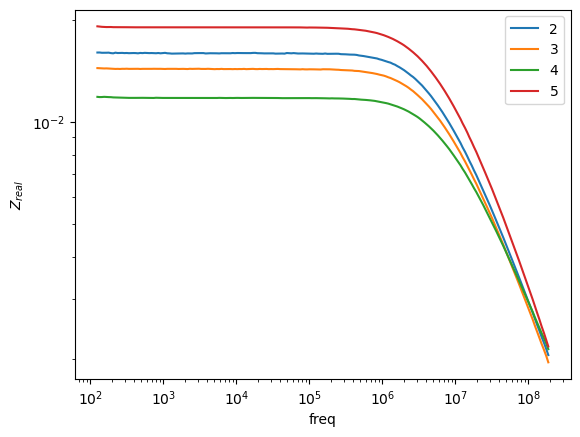

In [49]:
for x in np.arange(2,6,1):
    plt.loglog(freq,new_imp[f"imp{x}"]/10**8,label=f"{x}")
plt.legend()
plt.xlabel('freq')
plt.ylabel(r'$Z_{real}$')

Text(0, 0.5, '$Z_{real}$')

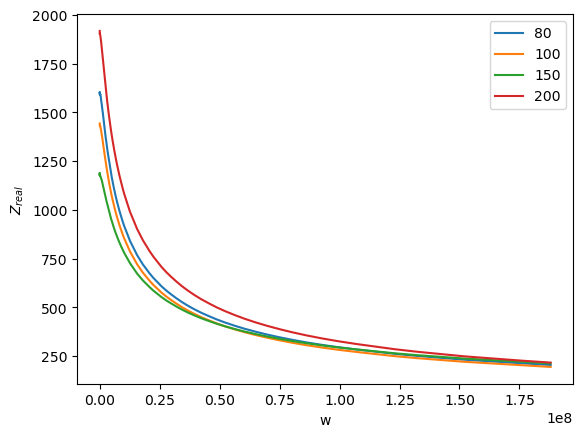

In [31]:
#plt.plot(freq,new_imp["imp1"],label='50')
plt.plot(freq,new_imp["imp2"]/10**3,label='80')
plt.plot(freq,new_imp["imp3"]/10**3,label='100')
plt.plot(freq,new_imp["imp4"]/10**3,label='150')
plt.plot(freq,new_imp["imp5"]/10**3,label='200')
plt.legend()
plt.xlabel('w')
plt.ylabel(r'$Z_{real}$')

In [47]:
def create_graph_from_sample(edges,seed):

    np.random.seed(seed)
    #G1=nx.random_regular_graph(1,10)

    P= [(i,j) for i in range(701) for j in range(701) if i!=j]

    sample_indices = choice(len(P),edges,replace=False)

    sampled_edges = [P[i] for i in sample_indices]

    G= nx.Graph()

    #print(sampled_edges)

    G.add_edges_from(sampled_edges)


    #nx.is_connected(G)

    return G

In [27]:
def identify_unconnected_nodes(G):
    """
    Identifies and prints nodes that are not connected in the given graph.

    Args:
        G (nx.Graph): The graph to check for connectivity.
    """
    unconnected_nodes = []

    if not nx.is_connected(G):
        components = list(nx.connected_components(G))
        for i in range(1, len(components)):  # Exclude the largest (connected) component
            unconnected_nodes.extend(list(components[i]))  

    return unconnected_nodes

# Example usage (assuming you have a graph G)
for n in range(200):
    unconnected_nodes = identify_unconnected_nodes(create_graph_from_sample(2100,n))
    if unconnected_nodes:
        print("The following nodes are not connected:", unconnected_nodes)
    else:
        print("All nodes are connected.")

All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.
All nodes are connected.


In [ ]:
nx.draw(create_graph_from_sample(5,2))

In [ ]:
def create_connected_graph(edg, seed=None):
    """
    Creates a random graph with a guaranteed minimum number of edges, ensuring connectivity.

    Args:
        edges (int): The minimum number of edges in the graph.
        seed (int, optional): Seed for random number generation. Defaults to None.

    Returns:
        nx.Graph: The generated connected graph.
    """
    if seed is not None:
        np.random.seed(seed)

    # 1. Create a minimal spanning tree
    nodes = list(range(1000))  # Assume 1000 nodes
    mst_edges = nx.random_spanning_tree(nodes, seed=seed).edges()
    G = nx.Graph()
    G.add_edges_from(mst_edges)

    # 2. Add remaining edges randomly
    remaining_edges = edg - len(mst_edges)
    if remaining_edges > 0:
        P = [(i, j) for i in nodes for j in nodes if i != j and not G.has_edge(i, j)]
        sample_indices = choice(len(P), remaining_edges, replace=False)
        sampled_edges = [P[i] for i in sample_indices]
        G.add_edges_from(sampled_edges)

    return G


In [ ]:
def E0(x):
    m1=[]
    for j in np.arange(0,x*x,x):
        m1.append([(i+j,i+1+j) for i in range(x-1)])
    return np.array(m1).reshape(-1,2) 

def E1(x):
    m1=[]
    for j in np.arange(0,x*x-x,1):
        m1.append((j,x+j))
    return np.array(m1).reshape(-1,2) 

In [ ]:
def graph(x):
#    node_mapping={}
#    node_count = 0
    G = nx.Graph()    
    e0 = E0(x)
    e1= E1(x)
    G.add_edges_from(e0)
    G.add_edges_from(e1)
#    for node in G.nodes:
        
    return G

In [ ]:
graph(10)

In [63]:
grid = create_graph_from_sample(1200,0)
nodes = grid.number_of_nodes()
nedge = grid.number_of_edges()
#xxx = list(grid.edges())
print(nodes,nedge,xxx)

684 1199 [(430, 274), (430, 292), (430, 366), (430, 501), (274, 66), (274, 9), (46, 113), (46, 119), (46, 396), (46, 324), (46, 307), (46, 555), (46, 363), (46, 498), (113, 372), (113, 579), (113, 45), (113, 81), (113, 673), (113, 139), (113, 490), (113, 613), (505, 690), (505, 111), (505, 451), (505, 524), (505, 502), (505, 106), (505, 596), (690, 559), (690, 664), (690, 464), (690, 303), (690, 485), (690, 640), (40, 357), (40, 490), (40, 512), (40, 121), (40, 269), (40, 268), (40, 32), (357, 339), (357, 340), (357, 173), (357, 400), (319, 119), (319, 428), (319, 214), (319, 523), (319, 163), (319, 186), (319, 494), (119, 336), (119, 601), (119, 331), (119, 425), (119, 501), (512, 189), (512, 247), (512, 619), (512, 570), (512, 61), (512, 523), (512, 114), (512, 487), (512, 262), (189, 589), (189, 56), (189, 54), (189, 371), (368, 687), (368, 61), (368, 182), (368, 268), (368, 10), (687, 613), (687, 634), (687, 661), (687, 471), (687, 482), (334, 446), (334, 184), (334, 537), (334, 40

In [29]:
def dist(meanc, stdc,nedges,seed):
    np.random.seed(seed)
    return np.abs(np.random.normal(meanc, stdc,nedges))

In [49]:
def Rn(w,x,mean, std, configuration):
    grid = create_graph_from_sample(x,configuration)
    nodes = grid.number_of_nodes()
    nedge = grid.number_of_edges()
    
    rns = dist(mean, std,nedge,configuration)
    rj = dist(1, 0.2,nedge,configuration)

    adjM = sc.lil_matrix((nodes,nodes))
    
    xxx = list(grid.edges())
    #print(xxx)
    interactions = 1/(rns+rj/(1+(w*rj*1)**2))

    for edge_idx, (i, j) in enumerate(xxx):
        interaction_value = interactions[edge_idx]
        adjM[i, j] = interaction_value
        adjM[j, i] = interaction_value
        
    adjM = adjM.tocoo()    
    adjM.setdiag(-1*adjM.sum(axis=1).A1 - 0.000001)
    
    MI = spla.inv(-1*adjM.tocsc())  # Using inv for CSC matrices

    R = MI[0,0]+MI[500-1,500-1]-MI[500-1,0]-MI[0,500-1]
    #print(nodes)
    return R

In [51]:
for x in range(100):
    print(Rn(0,2100,1, 0, x))

IndexError: column index (700) out of bounds

In [33]:
df6=pd.DataFrame()

In [41]:
for R in np.arange(0.1,2,0.1):
    print(R)
    R_total = [np.mean([Rn(w,3100,R,0,seed) for seed in range(100)]) for w in freq]
    df6[f'Z_{R*10}']=R_total

0.1


IndexError: column index (699) out of bounds

In [ ]:
df5.head()

In [ ]:
df5.columns = np.arange(1,10,1)

In [ ]:
plt.plot(df5[1])

In [ ]:
Req=[Rn(0,x,1, 0, 1) for x in np.arange(70,110,10)]

In [ ]:
df=pd.DataFrame()

In [ ]:
freq

In [ ]:
for std in np.arange(0,1,0.1):
    print(std)
    R_total = [np.mean([Rn(w,70,1,std,x) for x in range(10)]) for w in freq]
    df[f'Z_{std}']=R_total

In [ ]:
df.head()

In [ ]:
def Rn2(w,x,mean, std, configuration):
    grid = graph(x)
    nodes = grid.number_of_nodes()
    nedge = grid.number_of_edges()
    
    rns = dist(mean, std,nedge,configuration)
    rj = dist(1, 0,nedge,configuration)

    row_indices, col_indices = zip(*grid.edges())
    data = 1 / (rns + rj / (1 + (w * rj * 1)**2))
    adjM = sc.coo_matrix((data, (row_indices + col_indices, col_indices + row_indices)),
                         shape=(nodes, nodes), dtype=np.float64)
    adjM.setdiag(-1 * adjM.sum(axis=1).A1 - 0.0001)

    # Use iterative solver for larger matrices
    try:
        MI = spla.spsolve(adjM.tocsc(), np.eye(nodes, dtype=np.float64)) 
    except RuntimeError:
        print(f"Failed to converge for dim={x}x{y}. Trying LSQR...")
        MI = spla.lsqr(adjM.tocsc(), np.eye(nodes, dtype=np.float64))[0]

    R = MI[0,0]+MI[nodes-1,nodes-1]-MI[nodes-1,0]-MI[0,nodes-1]
    #print(nodes,nedge)
    return R

In [ ]:
plt.plot(np.log(freq),np.log(df['Z_0.1']))

In [ ]:
np.logspace(0,5,num=100)

In [ ]:
for R in np.logspace(4,6,num=10):
    print(R)
    R_total = [np.mean([Rn(w,40,R,0.1*R,x) for x in range(100)]) for w in freq]
    df3[f'Z_{R}']=R_total

In [ ]:
df3.head()

In [ ]:
df4=pd.DataFrame()

In [ ]:
df3.columns = [np.arange(0,10,1)]

In [ ]:
misfit=[]
for x in range(10):
    y=np.log(np.abs(np.array(df3[x])-np.array(new_imp["imp3"]))).sum()
    misfit.append(y)
    

In [ ]:
plt.plot(misfit)

In [ ]:
new_imp.iloc[1,1:]

In [ ]:
for R in np.arange(0.1,1,0.1):
    print(R)
    R_total = [np.mean([Rn(w,5000,R,0,seed) for seed in range(100)]) for w in np.arange(0,1,0.1)]
    df5[f'Z_{R*10}']=R_total

In [ ]:
df5 = pd.DataFrame()

In [ ]:
df4.columns = np.arange(0,18,1)

In [ ]:
plt.plot(np.log(freq),new_imp['imp3']/10**6)

In [ ]:
plt.plot(np.log(df4[10]))